In [1]:
import sys,os
import torch
sys.path.append('../')
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
from fast_jtnn import *
import pandas as pd

## Load Model

In [3]:
generator = LigandGenerator()

/home/scorej41075/anaconda3/envs/chem/lib/python3.7/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


## Model Architecture

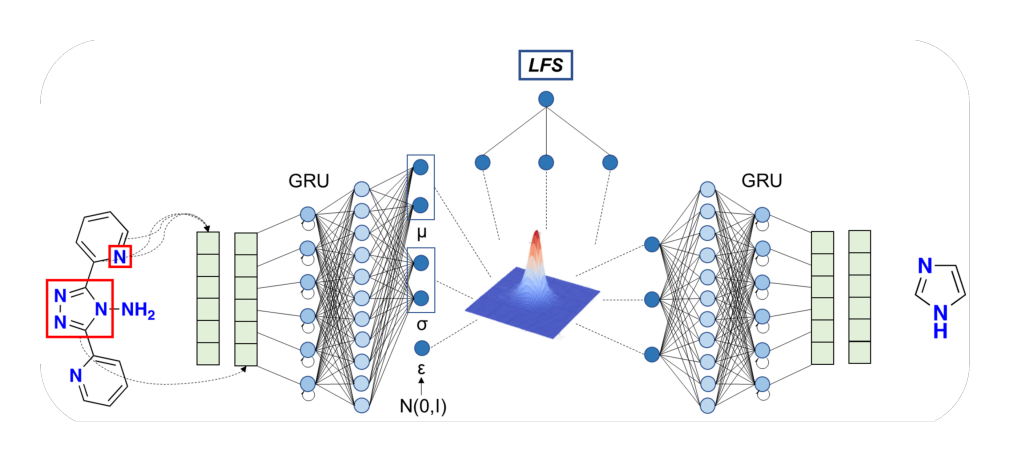

In [3]:
generator.show_model_architecture()

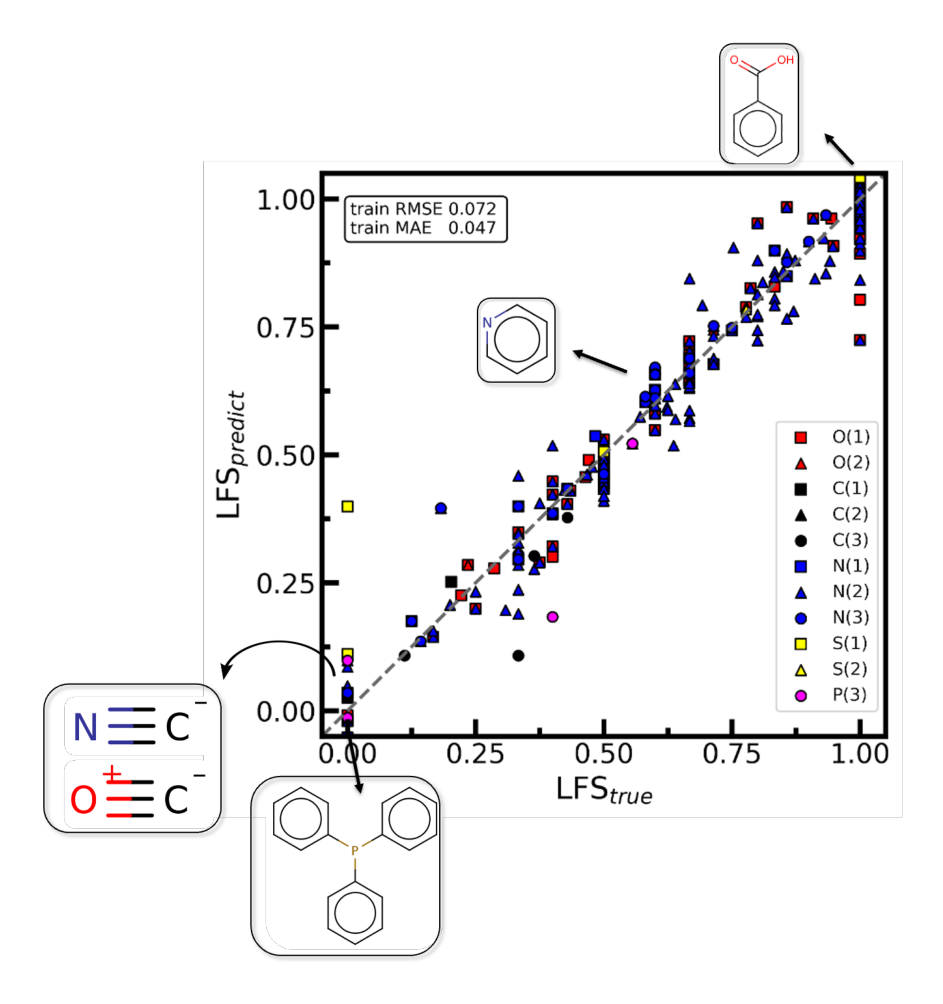

In [3]:
generator.show_parity_plot()

## Show LFS_metric

In [4]:
generator.LFS_metric()

,,LFS metric,Spectrochemical series
0,H₂O,0.943,Weak
1,Cl⁻,0.917,Weak
2,OH⁻,0.889,Weak
3,phen,0.85,Strong
4,–N=C=S,0.786,Weak
5,F⁻,0.528,Weak
6,MeCN,0.484,Intermediate
7,Py,0.639,Intermediate
8,en,0.429,Strong
9,N₃⁻,0.420,Weak


## Show Density Plot

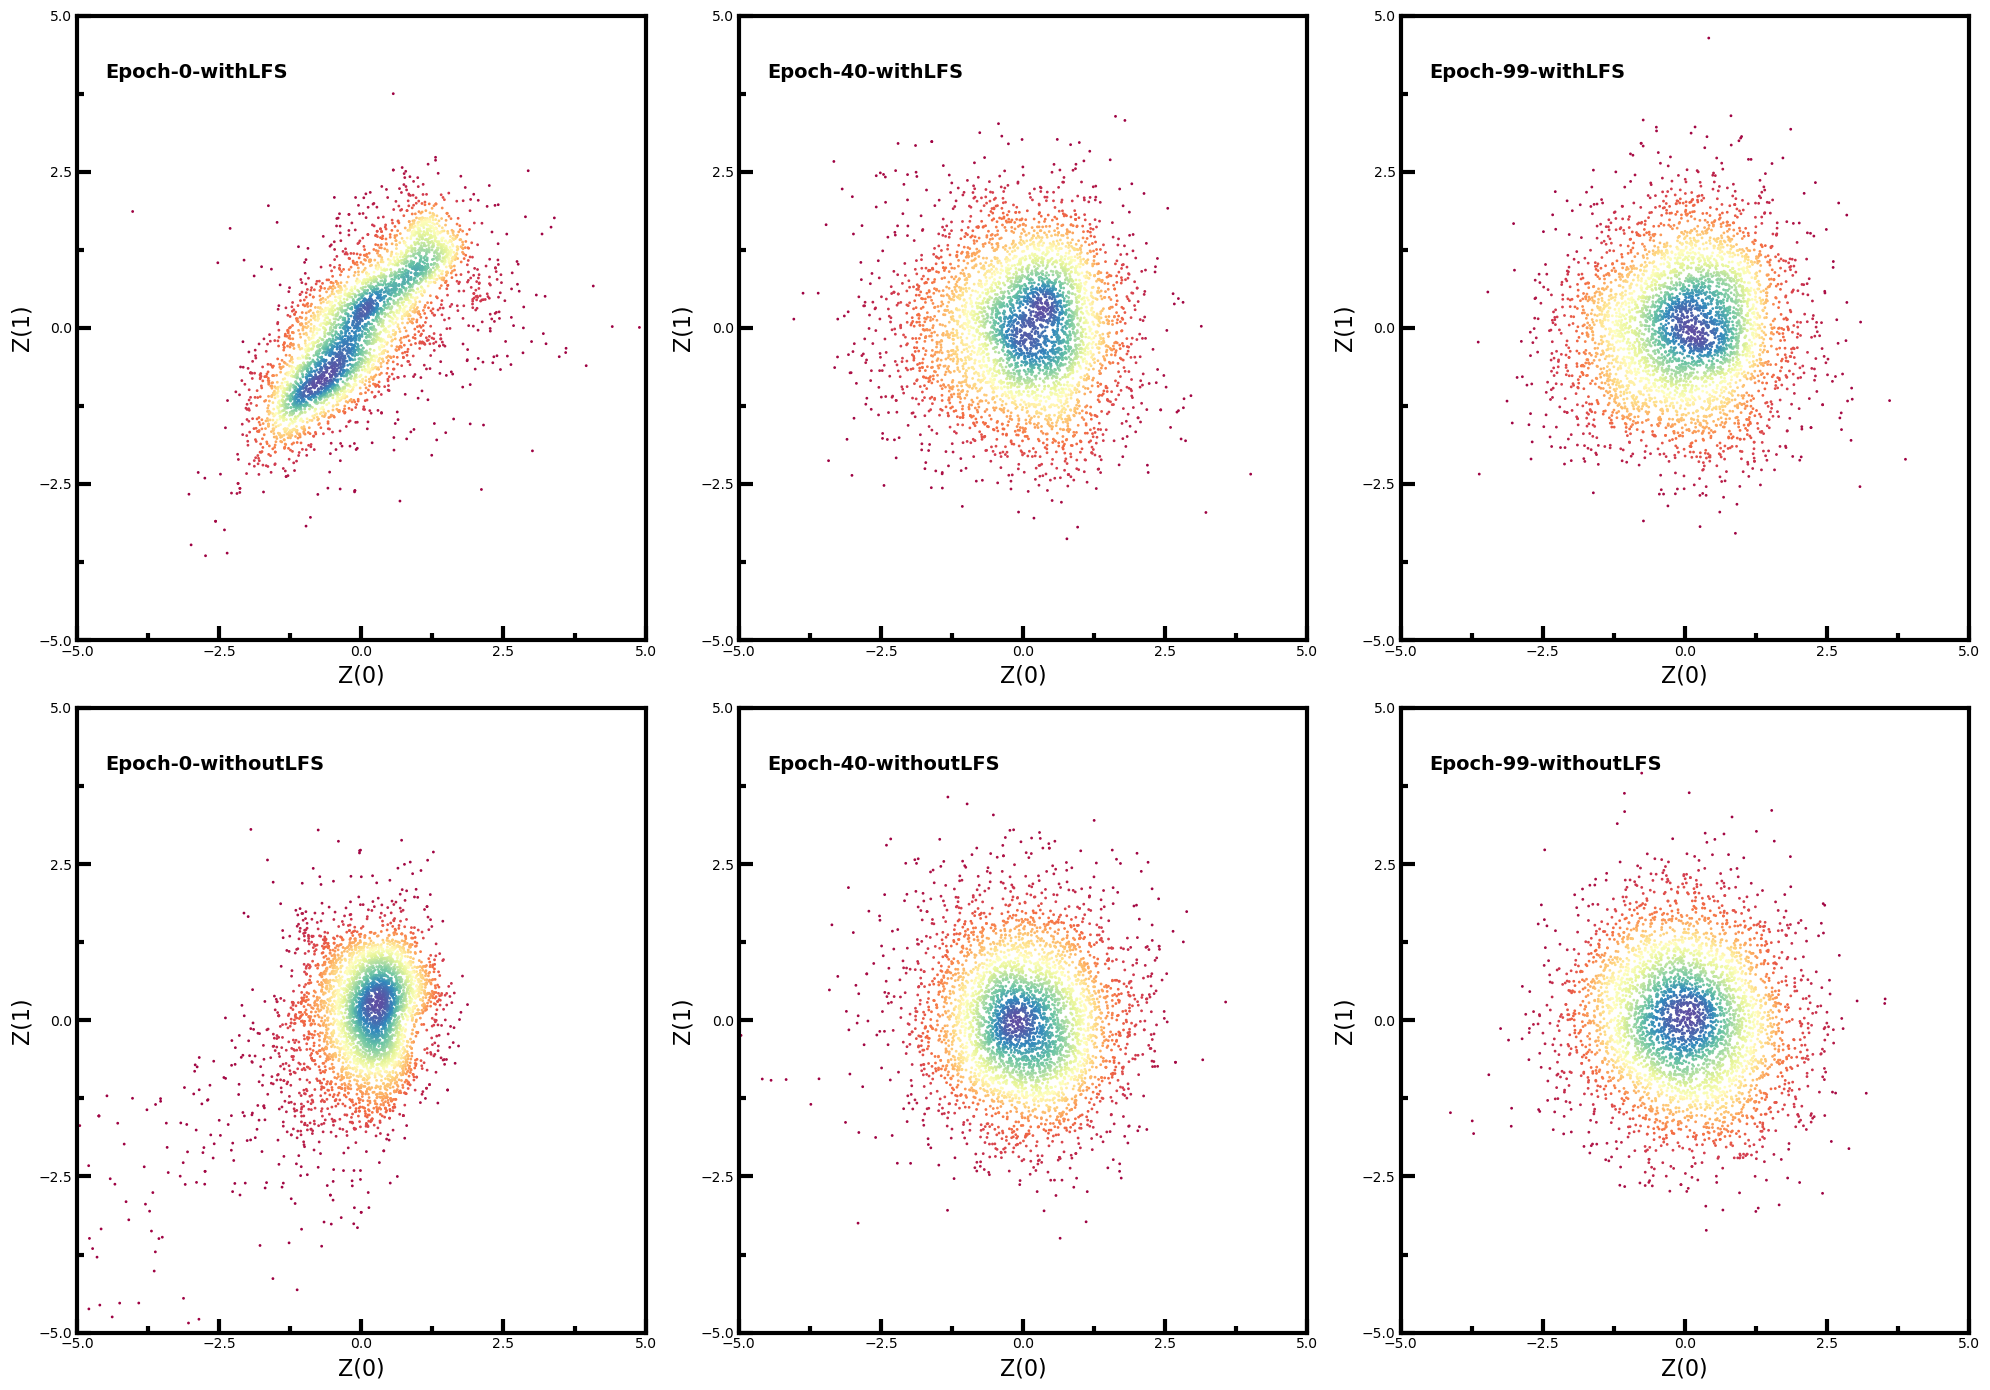

In [4]:
generator.density_plot()

## Show Density Plot with LFS_value

../fast_jtnn/lfsutils.py:338: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


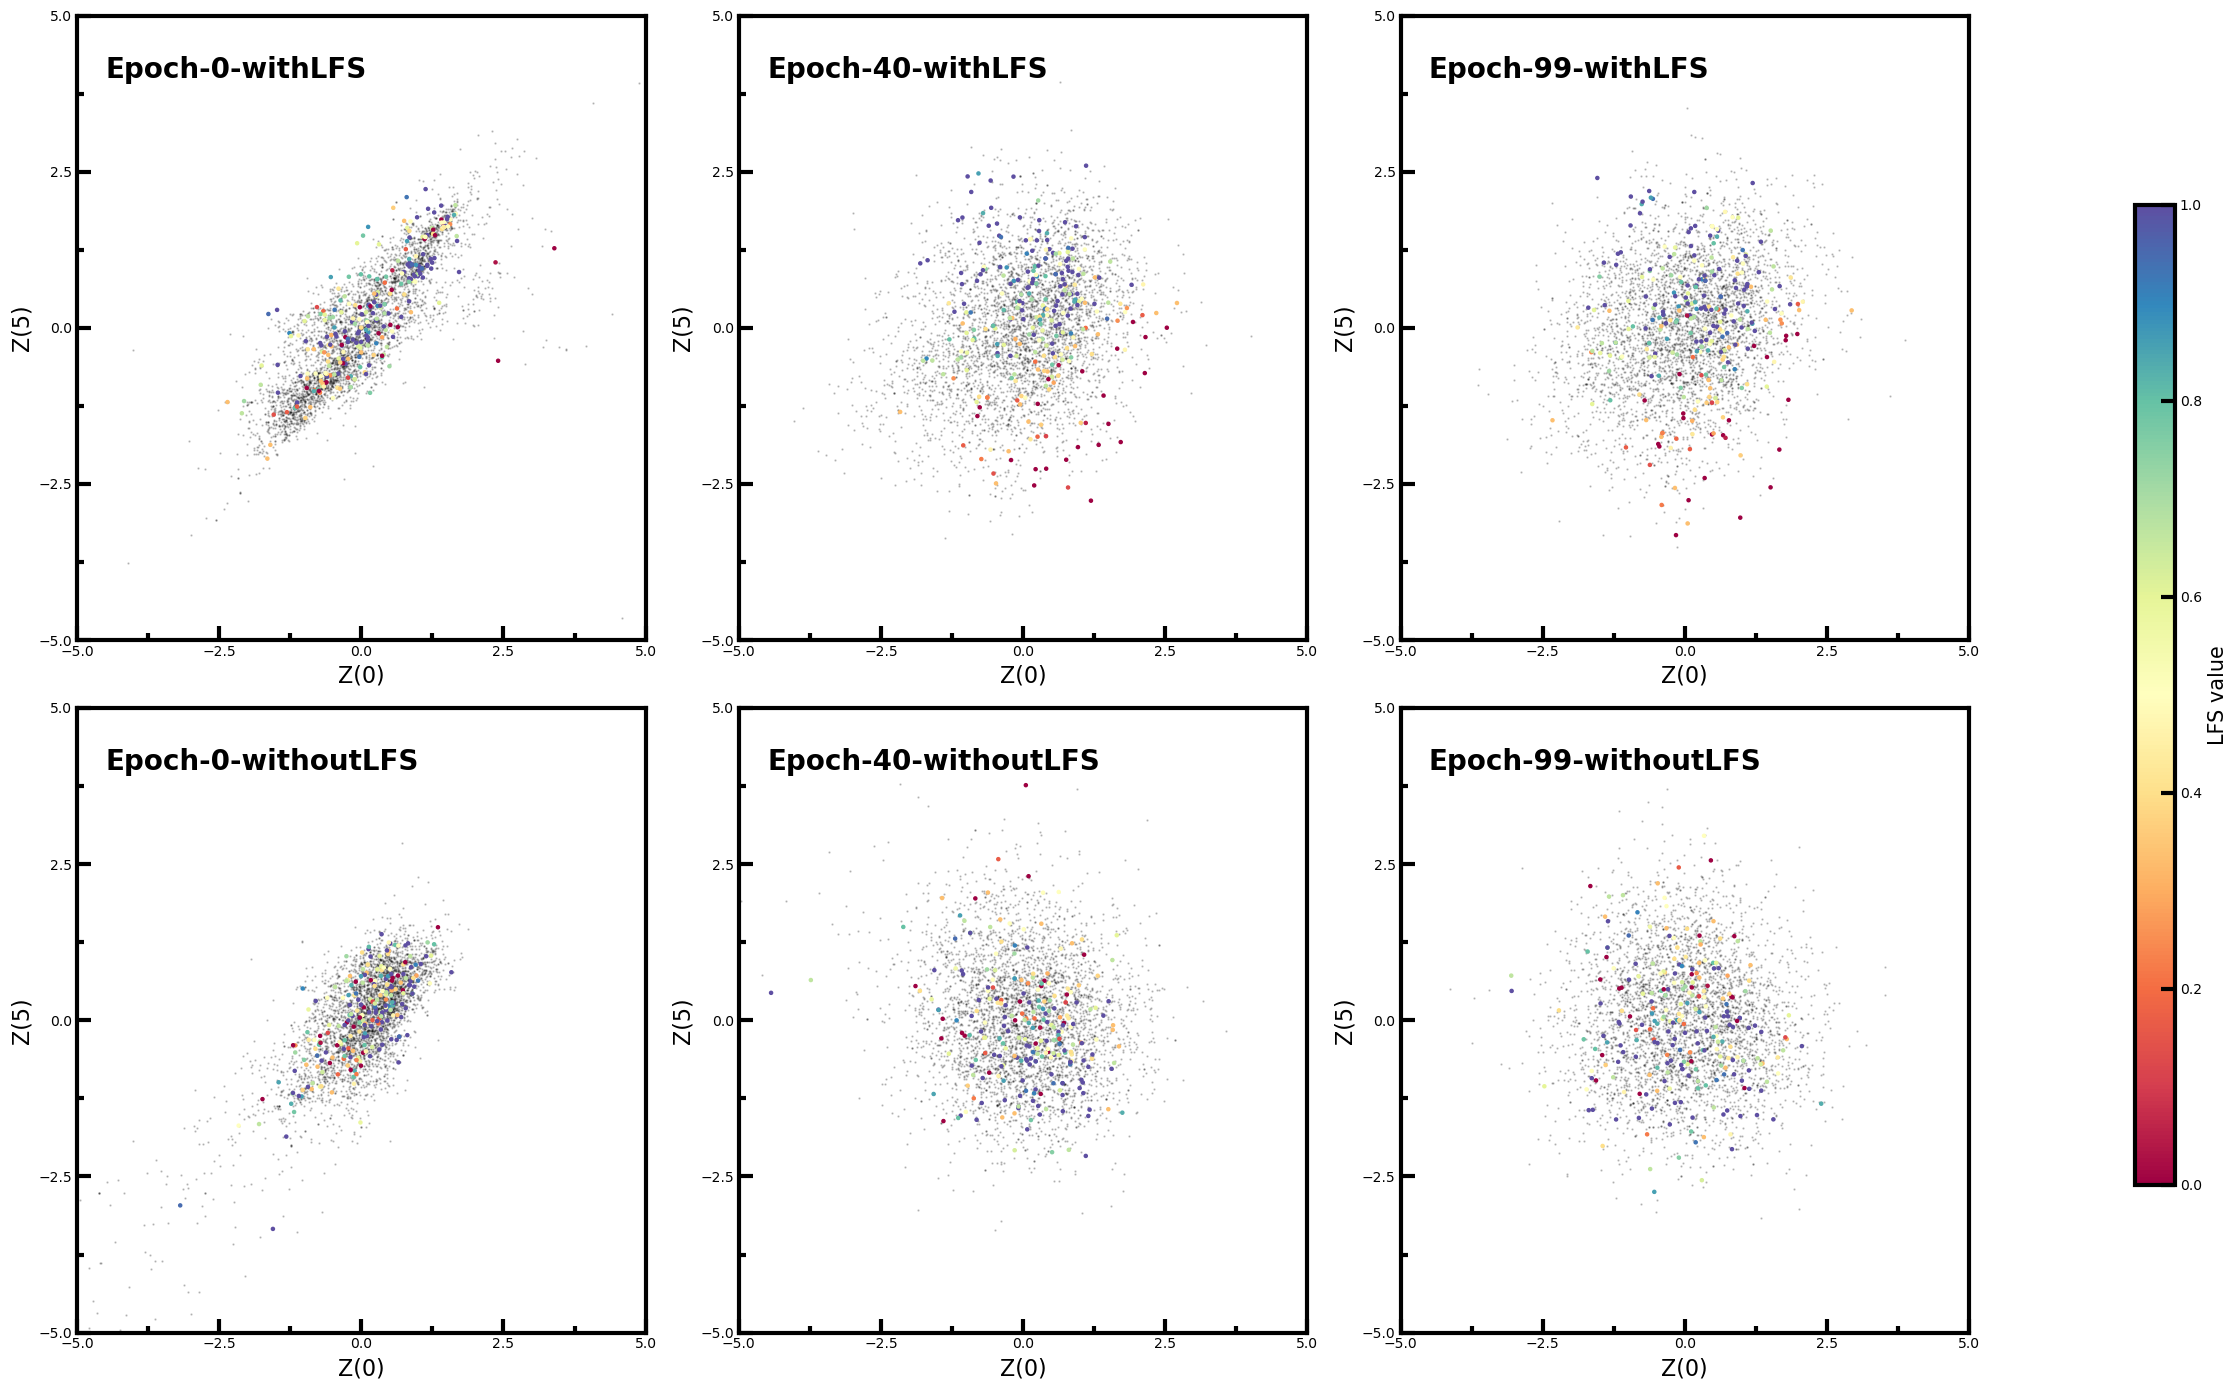

In [5]:
generator.LFS_densityplot()

## Random Sampling

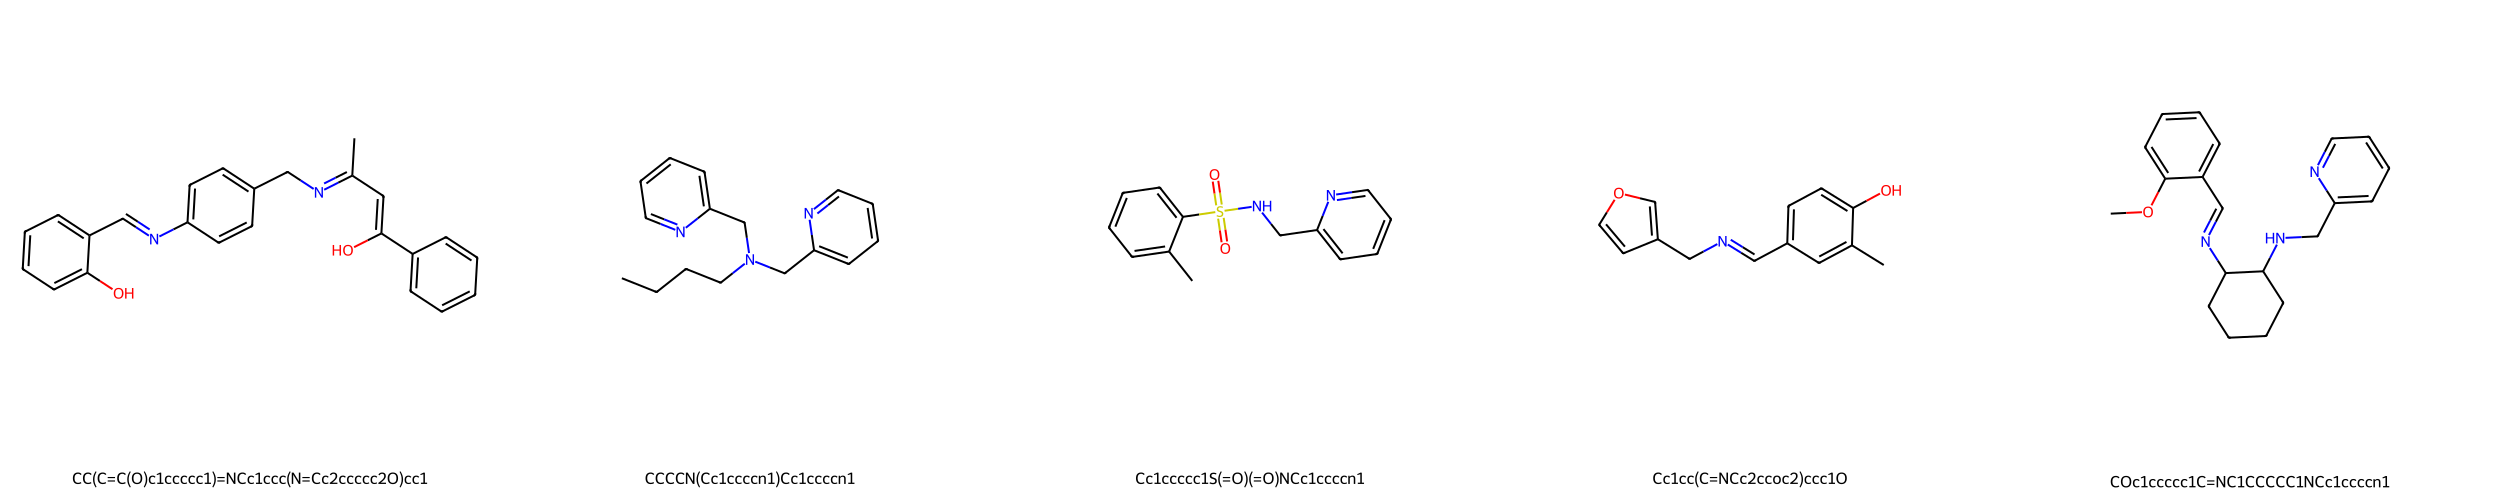

In [6]:
'''Change the number of molecules to generate'''
numsmiles = 5

# Generate random molecules
smiles = generator.randomgen(numsmiles)

# Draw the generated molecules
if numsmiles >= 5:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=5, subImgSize=(500, 500), legends=smiles)
else:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=numsmiles, subImgSize=(500, 500), legends=smiles)

# Display the image with the generated molecules
img


## Sampling from Molecule Seed (without LFS)

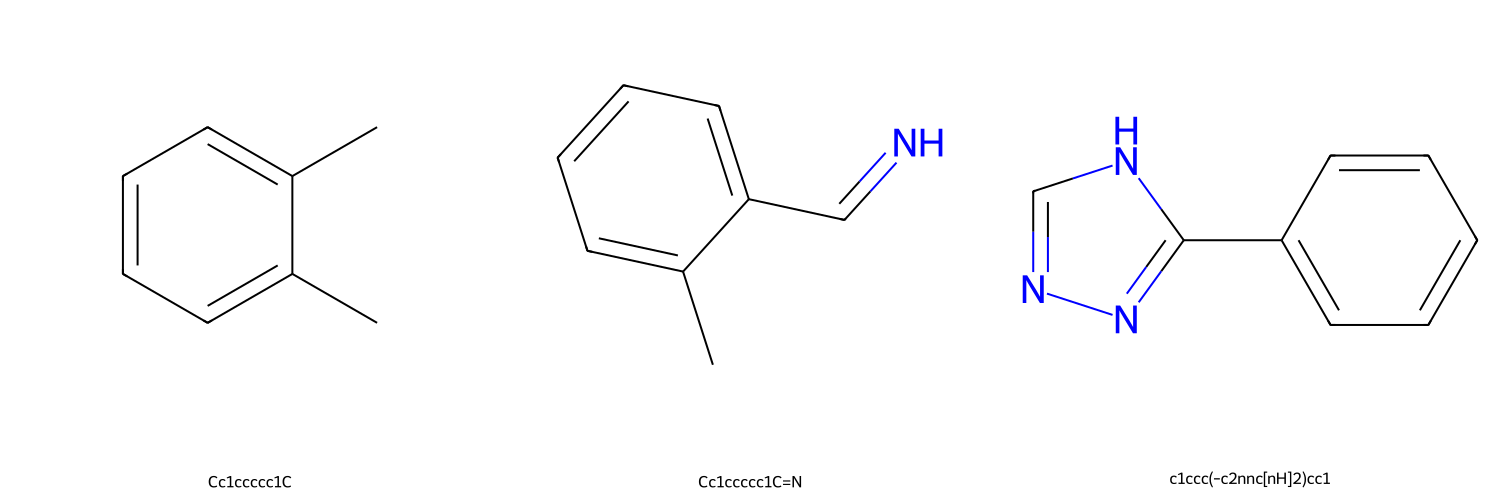

In [7]:
''' Define the target molecule seed '''
target_smile = 'c1ccccc1'

''' Specify the number of molecules to generate '''
numsmiles = 3

'''Set the bias or step size to create different molecules'''
step_size = 0.01

'''Generate molecules based on the target molecule'''
smiles = generator.gen_from_target_withoutprop(target_smile, numsmiles)

# Draw the generated molecules
if numsmiles >= 5:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=5, subImgSize=(500, 500), legends=smiles)
else:
    img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=numsmiles, subImgSize=(500, 500), legends=smiles)

# Display the image with the generated molecules
img

## Optimization Target(with LFS)

Running optimizaiotn...
Start decoding...


../fast_jtnn/lfsutils.py:147: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df_all = np.array(df_all).T


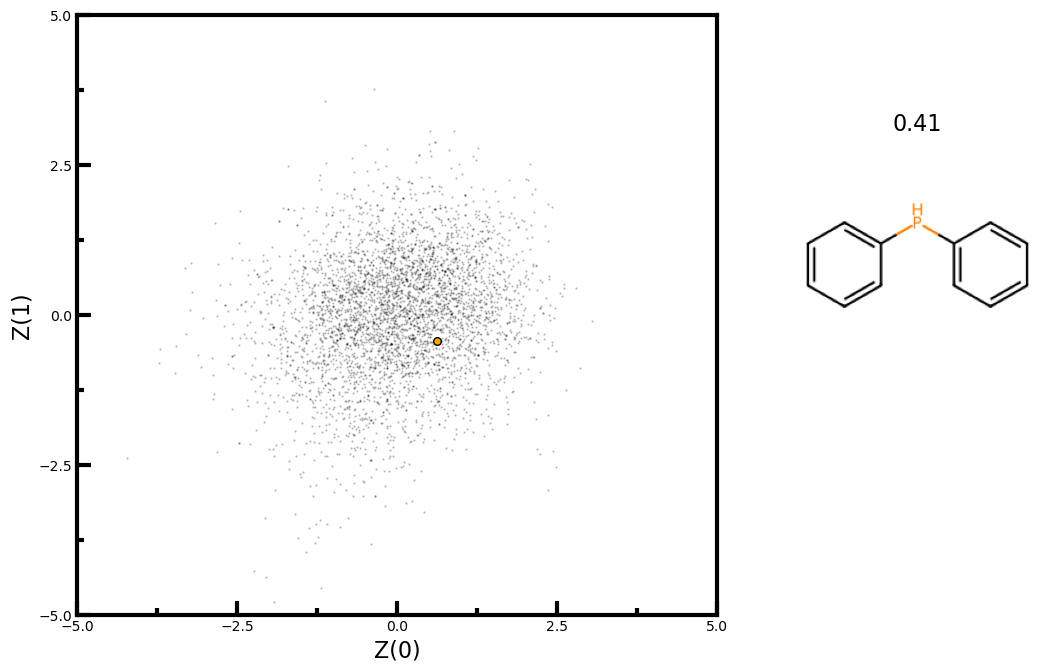

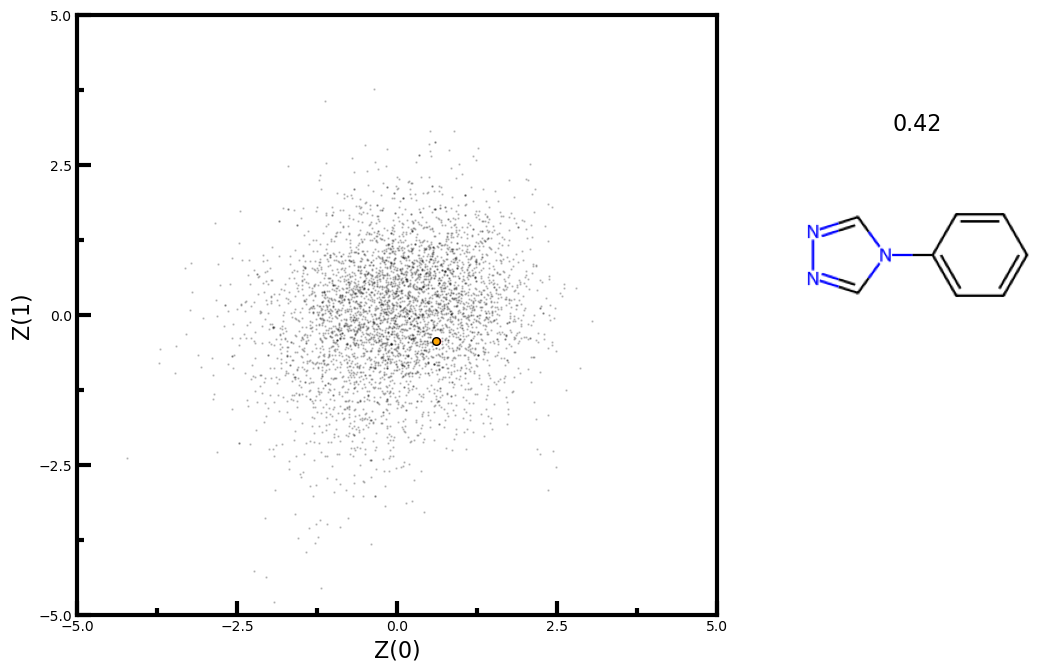

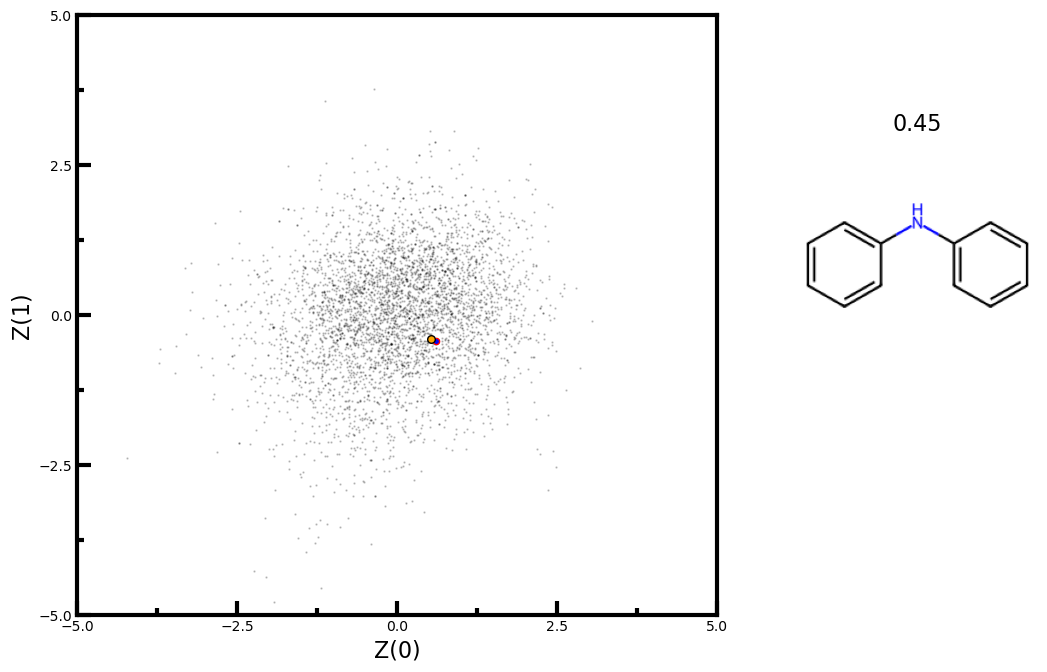

In [6]:
''' Define the target molecule seed '''
smile = 'c1ccccc1'
''' Define the target LFS values'''
lfs_target = 0.5

target_generator = generator.LFS_optimization(lfs_target,smile)
generator.scatter_plot(target_generator)
